In [1]:
# https://www.data.go.kr/dataset/15012890/standard.do

In [2]:
# conda(pip) install pandas-porfiling
# conda(pip) install wordcloud


In [3]:
# import pandas_profiling
from wordcloud import WordCloud

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [13]:
df = pd.read_csv('./data/전국도시공원표준데이터.csv',encoding='cp949')
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

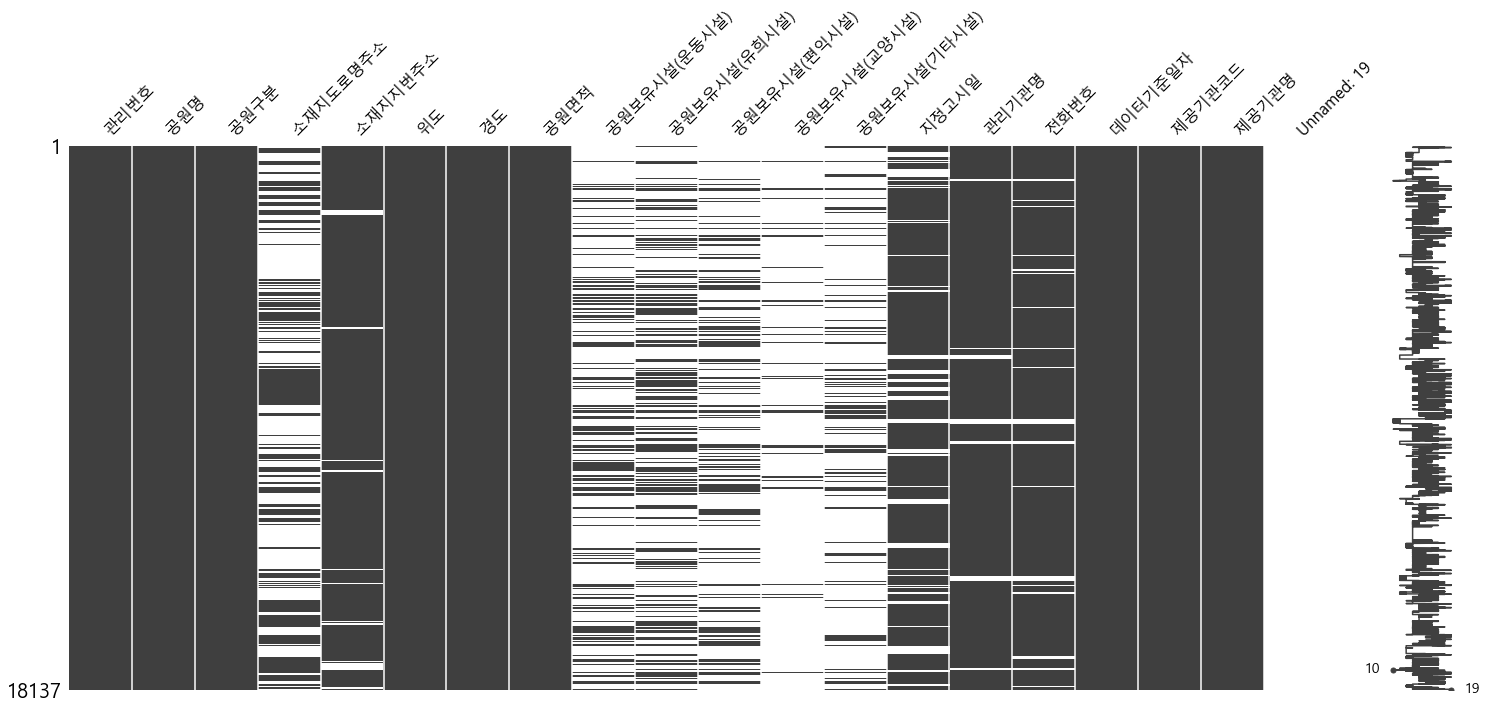

In [15]:
import missingno as msno
msno.matrix(df)

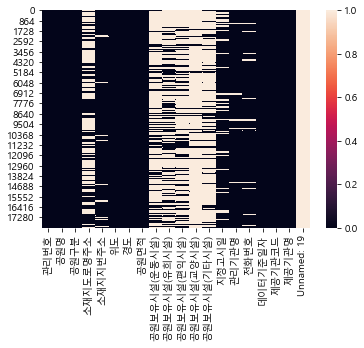

In [16]:
sns.heatmap(df.isnull())

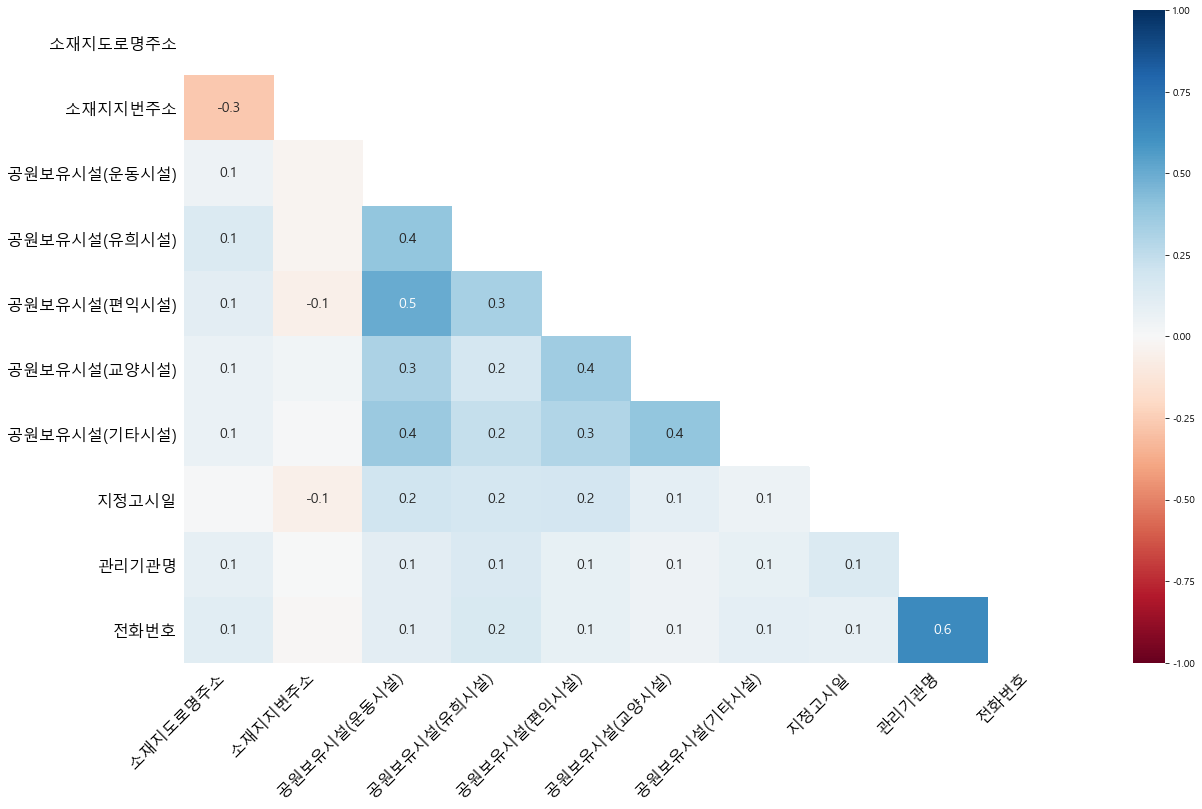

In [17]:
msno.heatmap(df)

##### 도로명주소와 소재지지번 주소 모두 데이터를 가진 데이터수

In [21]:
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


In [23]:
df[(~df.소재지도로명주소.isnull()) & (~df.소재지지번주소.isnull())]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
22,26440-00023,명지공원,근린공원,부산광역시 강서구 명지오션시티7로 30 (명지동),부산광역시 강서구 명지동 3247번지,35.087766,128.908524,170405.0,10,NaN,"화장실2, 주차장, 관리사무소",NaN,"바닥분수, 다목적운동장, 볼라드62, 안내판4, 안내석, 야외석물탁자5, 통돌벤치2...",2001-09-26,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
23,26440-00024,철새탐방공원,문화공원,부산광역시 강서구 명지오션시티1로 284 (명지동),부산광역시 강서구 명지동 3308-3,35.084080,128.911810,1344.0,NaN,NaN,NaN,NaN,"이층정자1, 철새탐조대1, 등의자2",2008-11-12,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
32,26440-00033,보람공원,근린공원,부산광역시 강서구 녹산산단262로14번길 20 (송정동),부산광역시 강서구 송정동 1718,35.088095,128.843216,27739.0,9,NaN,"화장실, 주차장",NaN,"그늘시렁4, 평의자9, 등의자33, 농구골대2, 다목적운동장, 문주4, 안내판2, ...",1992-03-26,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
38,26440-00039,지사공원(2호근린공원),근린공원,부산광역시 강서구 과학산단2로20번길 7-7 (지사동),부산광역시 강서구 지사동 1180,35.151337,128.831400,11232.0,13,조합놀이기구,문화회관,NaN,"전시벽6, 상징조형물, 파고라, 야외무대62.1㎡, 평의자3, 등의자6, 연식의자1...",2002-11-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
44,26440-00045,화암공원,근린공원,부산광역시 강서구 화전산단5로 131 (화전동),부산광역시 강서구 화전동 554-3,35.110563,128.877536,21908.0,9,조합놀이기구1,화장실,민속문화기념물(동제당),"사각플랜터11, 해시계광장조형물, 입체간판, 파고라7, 평상7, 막구조파고라12, ...",2005-12-30,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18027,11590-00040,국화원,소공원,"서울특별시 동작구 상도로30길 39(상도동, 상도두산위브아파트)",서울특별시 동작구 상도동 529 상도두산위브아파트,37.504836,126.943714,757.0,NaN,NaN,NaN,NaN,NaN,2007-11-08,서울특별시 동작구청,NaN,2019-02-20,3190000,서울특별시 동작구,NaN
18121,28140-00011,창영공원,어린이공원,인천광역시 동구 우각로 26,인천광역시 동구 창영동 21-15,37.470778,126.639105,1019.8,"허리돌리기, 마라톤운동, 몸통돌리기","조합놀이대, 흔들놀이",음수대,NaN,"파고라, 의자, 앉음벽",1999-08-02,인천광역시 동구청,032-770-6205,2019-07-30,3500000,인천광역시 동구,NaN
18125,28140-00002,화도진공원,근린공원,인천광역시 동구 화도진로 114,인천광역시 동구 화수동 140-1,37.481481,126.628353,20830.0,"온몸노젓기, 등허리지압기, 어깨근육풀기, 마라톤운동, 하체근육운동, 하늘걷기",NaN,"주차장, 화장실, 음수대,공중전화","병영 11동, 유물전시관, 한미수교기념비, 아포전시장","관리사무실, 벽천분수, 앉음벽, 국기게양대",1986-09-29,인천광역시 동구청,032-770-6202,2019-07-30,3500000,인천광역시 동구,NaN
18126,28140-00003,"인천교공원(A,B블럭)",근린공원,인천광역시 동구 방축로 231,인천광역시 동구 송림동 318,37.477844,126.669618,94068.0,"축구장, 족구장겸농구장, 육상트랙","조합놀이대, 그네, 모래놀이터","주차장, 화장실, 음수대",어린이교통안전교육장,"어린이교통공원, 구민운동장, 관리사무실, 국기게양대",1986-09-29,인천광역시 동구청,032-770-6203,2019-07-30,3500000,인천광역시 동구,NaN


##### 도로명주소의 null값을 소재지주소값으로 채우기

In [30]:
df['소재지도로명주소'] = df.소재지도로명주소.fillna(df['소재지지번주소'])

In [31]:
df.소재지도로명주소.isnull().sum()

0

In [32]:
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


In [41]:
df['시도'] = df.소재지도로명주소.apply(lambda x : x.split(' ')[0])
# df.소재지도로명주소.str.split(expand = True)[0] : 동일하게 시도만 뽑아냄

In [42]:
df['시도'].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

### scatterplot 활용
##### 공원분포 출력

In [43]:
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19,시도
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,...,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN,부산광역시


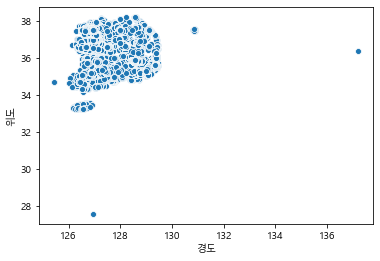

In [44]:
sns.scatterplot(data = df, x='경도', y='위도')

### 이상치 제거

In [46]:
df = df[(df['경도'] < 132) & (df.위도 > 32)]

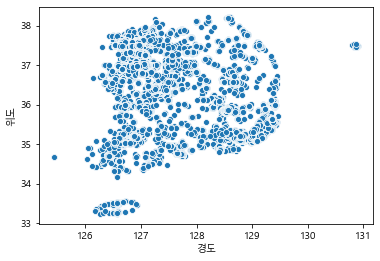

In [47]:
sns.scatterplot(data = df, x='경도', y='위도')

##### 지정고시일 datetime으로 변경

In [48]:
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19,시도
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,...,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN,부산광역시


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18135 entries, 0 to 18136
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18135 non-null  object 
 1   공원명           18135 non-null  object 
 2   공원구분          18135 non-null  object 
 3   소재지도로명주소      18135 non-null  object 
 4   소재지지번주소       17156 non-null  object 
 5   위도            18135 non-null  float64
 6   경도            18135 non-null  float64
 7   공원면적          18135 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15223 non-null  object 
 14  관리기관명         17381 non-null  object 
 15  전화번호          16955 non-null  object 
 16  데이터기준일자       18135 non-null  object 
 17  제공기관코드        18135 non-null  object 
 18  제공기관명         18135 non-nu

In [52]:
import time
df['지정고시일'] =  pd.to_datetime(df['지정고시일'])
df['데이터기준일자'] = pd.to_datetime(df['데이터기준일자'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18135 entries, 0 to 18136
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   관리번호          18135 non-null  object        
 1   공원명           18135 non-null  object        
 2   공원구분          18135 non-null  object        
 3   소재지도로명주소      18135 non-null  object        
 4   소재지지번주소       17156 non-null  object        
 5   위도            18135 non-null  float64       
 6   경도            18135 non-null  float64       
 7   공원면적          18135 non-null  float64       
 8   공원보유시설(운동시설)  4845 non-null   object        
 9   공원보유시설(유희시설)  6964 non-null   object        
 10  공원보유시설(편익시설)  5084 non-null   object        
 11  공원보유시설(교양시설)  1160 non-null   object        
 12  공원보유시설(기타시설)  3116 non-null   object        
 13  지정고시일         15223 non-null  datetime64[ns]
 14  관리기관명         17381 non-null  object        
 15  전화번호          16955 non-null  object

##### 어느시점에 몇 개의 공원이 고시되었는지 확인

In [59]:
df['year'] = df.지정고시일.dt.year
df['month'] = df.지정고시일.dt.month

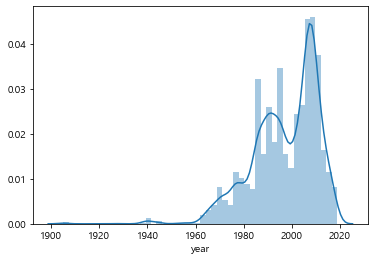

In [69]:
sns.distplot(df.year)

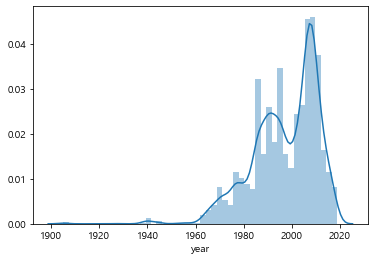

In [68]:
sns.distplot(df.year[df['year'].notnull()])

In [71]:
y_m = pd.pivot_table(df,index='year',columns='month',values='공원명',aggfunc='count')

##### 2000~2019데이터 추출

In [75]:
y_m.loc[2000.:]

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
year,,,,,,,,,,,,
2000.0,17.0,13.0,25.0,17.0,13.0,44.0,26.0,10.0,14.0,13.0,11.0,34.0
2001.0,48.0,12.0,7.0,42.0,21.0,16.0,6.0,16.0,30.0,36.0,37.0,40.0
2002.0,38.0,19.0,18.0,10.0,18.0,14.0,49.0,17.0,7.0,7.0,59.0,55.0
2003.0,21.0,13.0,17.0,18.0,10.0,23.0,4.0,8.0,7.0,18.0,48.0,38.0
2004.0,48.0,18.0,16.0,18.0,13.0,24.0,7.0,48.0,10.0,24.0,59.0,135.0
2005.0,55.0,32.0,18.0,23.0,43.0,33.0,16.0,62.0,18.0,34.0,60.0,105.0
2006.0,84.0,34.0,69.0,31.0,54.0,32.0,18.0,33.0,24.0,36.0,119.0,120.0
2007.0,69.0,12.0,9.0,42.0,16.0,46.0,62.0,66.0,84.0,164.0,245.0,106.0
2008.0,163.0,45.0,77.0,42.0,30.0,102.0,15.0,61.0,32.0,20.0,24.0,126.0


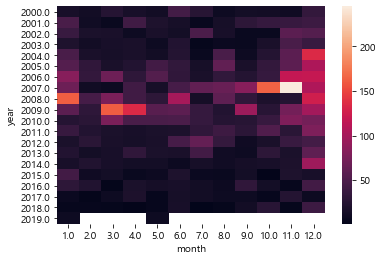

In [76]:
sns.heatmap(y_m.loc[2000.:])

In [78]:
y_m.loc[2000.:].style.background_gradient()

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
year,,,,,,,,,,,,
2000.0,17.000000,13.000000,25.000000,17.000000,13.000000,44.000000,26.000000,10.000000,14.000000,13.000000,11.000000,34.000000
2001.0,48.000000,12.000000,7.000000,42.000000,21.000000,16.000000,6.000000,16.000000,30.000000,36.000000,37.000000,40.000000
2002.0,38.000000,19.000000,18.000000,10.000000,18.000000,14.000000,49.000000,17.000000,7.000000,7.000000,59.000000,55.000000
2003.0,21.000000,13.000000,17.000000,18.000000,10.000000,23.000000,4.000000,8.000000,7.000000,18.000000,48.000000,38.000000
2004.0,48.000000,18.000000,16.000000,18.000000,13.000000,24.000000,7.000000,48.000000,10.000000,24.000000,59.000000,135.000000
2005.0,55.000000,32.000000,18.000000,23.000000,43.000000,33.000000,16.000000,62.000000,18.000000,34.000000,60.000000,105.000000
2006.0,84.000000,34.000000,69.000000,31.000000,54.000000,32.000000,18.000000,33.000000,24.000000,36.000000,119.000000,120.000000
2007.0,69.000000,12.000000,9.000000,42.000000,16.000000,46.000000,62.000000,66.000000,84.000000,164.000000,245.000000,106.000000
2008.0,163.000000,45.000000,77.000000,42.000000,30.000000,102.000000,15.000000,61.000000,32.000000,20.000000,24.000000,126.000000


## 텍스트분석
### 정규표현식
    [] : 대괄호 내의 문자와 일치하는 패턴
    [가나다] : 가 or 나 or 다 하나와 일치
    [ㄱ-힣] : 한글
    [0-9] : 숫자
    [a-zA-Z] : 영문자
    [^0-9] : 숫자를 포함하지 않는 패턴
    [^ㄱ=힣] : 한글을 포함하지 않는 패턴
    
    \d : 숫자
    \s : 공백문자
    \w : 영문자
    
    ^x : x로 시작하는 문자
    x$ : x로 끝나는 문자
    .x : 한 문자와 x로 끝나는 패턴
    x+ : x가 하나이상 존재
    x? : x가 1번이하 존재
    x* : x가 0번이상 존재
    x{n} : x가 n번 존재
    x{n:m} : x가 n~m개 사이로 존재

In [79]:
import re

In [85]:
pd.options.display.max_columns = 25  # columns의 표시 수를 늘려줌
# pd.options.display.max_rows = 20

In [86]:
df.head(20)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19,시도,year,month
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN,부산광역시,2011.0,9.0
1,26440-00002,압곡공원,근린공원,부산광역시 강서구 구랑동 1219,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN,부산광역시,2008.0,2.0
2,26440-00003,서연정공원,소공원,부산광역시 강서구 대저1동 1330-7,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN,부산광역시,2013.0,1.0
3,26440-00004,용두공원,어린이공원,부산광역시 강서구 대저2동 1870-67,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN,부산광역시,1998.0,7.0
4,26440-00005,새동내공원,어린이공원,부산광역시 강서구 대저2동 2407-1,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN,부산광역시,1995.0,4.0
5,26440-00006,상방공원,소공원,부산광역시 강서구 대저2동 3136-1,부산광역시 강서구 대저2동 3136-1,35.172659,128.952493,3791.0,5,"조합놀이대, 시소",NaN,NaN,"정자, 등의자5, 안내판, 공원등8",2006-11-21,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN,부산광역시,2006.0,11.0
6,26440-00007,덕두공원,소공원,부산광역시 강서구 대저2동 3136-3,부산광역시 강서구 대저2동 3136-3,35.170895,128.953453,4726.0,6,NaN,NaN,NaN,"파고라, 평의자3, 등의자2, 안내판, 공원등8",2006-11-21,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN,부산광역시,2006.0,11.0
7,26440-00008,근린공원,근린공원,부산광역시 강서구 대저2동 3146-2,부산광역시 강서구 대저2동 3146-2,35.165806,128.953667,14221.0,NaN,NaN,NaN,NaN,"자전거보관대, 연못, 파고라3, 등의자7, 평의자7, 족구장, 농구대2, 공원등27...",2006-11-21,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN,부산광역시,2006.0,11.0
8,26440-00009,샛바람길공원,소공원,부산광역시 강서구 동선동 1068-2,부산광역시 강서구 동선동 1068-2,35.054875,128.835424,330.0,3,NaN,NaN,NaN,"정자, 등의자2",2009-01-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN,부산광역시,2009.0,1.0
9,26440-00010,명지소공원,소공원,부산광역시 강서구 명지동 1396,부산광역시 강서구 명지동 1396,35.107636,128.926612,867.0,5,NaN,NaN,NaN,"파고라1, 앉음벽8m, 수도1, 안내판, 솟대5, 평의자2",2006-12-27,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN,부산광역시,2006.0,12.0


In [110]:
len(df['공원보유시설(운동시설)'].unique())

1486

In [111]:
df['공원보유시설(운동시설)'].value_counts()

운동기구                                         360
농구장                                          271
체력단련시설                                       224
배드민턴장                                        187
야외운동기구                                       105
                                            ... 
운동장+게이트볼장                                      1
야외체육시설(트윈워밍암 등)                                1
배드민턴장(2), 운동기구(4)                              1
인라인스케이트장, 농구장 등                                1
야외배드민턴장+축구장+테니스장+농구장+게이트볼장+실내배드민턴장+체력단련시설      1
Name: 공원보유시설(운동시설), Length: 1485, dtype: int64

##### 공원보유시설(운동시설)에서 각각의 농구시설이 몇 개가 있는지 확인

In [166]:
gym = str(df['공원보유시설(운동시설)'].unique().tolist())

In [167]:
gym = gym.replace('+', ',').replace("'",",").replace(" ",',').replace("/",",")

In [168]:
re.sub('\d','', gym)
gym = re.sub("[\[\d\-nan\.\]]", "", gym)
gym = re.sub(",{2,}", ",", gym)

In [169]:
gym_count = pd.Series(gym.split(',')).value_counts()

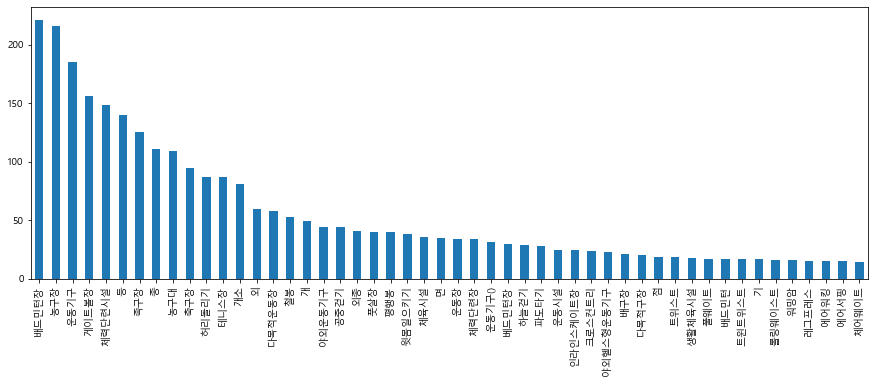

In [170]:
plt.figure(figsize= (15,5))
gym_count[:50].plot(kind='bar')

In [171]:
gym_count.sort_values()

생활체육시설지      1
윗몽일으키기       1
어린이운동시설      1
역기내리운동       1
썰매장          1
          ... 
체력단련시설     148
게이트볼장      156
운동기구       185
농구장        216
배드민턴장      221
Length: 604, dtype: int64

In [173]:
gym

',농구장,궁도장,풋살구장,풋살구장,농구장,인라인스케이트장,축구장,족구장,게이트볼장,운동기구개,농구장개소,족구장개소,운동기구개,족구장개소,운동기구개,운동기구개,운동기구개,에어로빅장,농구장,테니스장,씨름장,농구장,바디싣업,스트레칭롤러,전신돌리기,허리안마기,허리비틀기,TM스탭사이클,TM체어웨이트,TM트윈바디싣업,TM트윈트위스트,TM크로스컨트리,TM풀웨이트,철봉,하늘걷기,마라톤운동,허리돌리기,단철봉,윗몸일으키기,철봉,팔굽혀펴기,몸통돌리기,허리좌우로흔들기,스트레칭롤러,풀웨이트,바웨이트,하늘걷기,온몸허리돌리기,스트레칭기,거꾸로매달리기,하늘걷기,온몸허리돌리기,등허리지압기,철봉,스탭싸이클,풀웨이트,트리플트위스트,트윈바디싣업,크로스컨트리,스트레칭롤러,트윈워밍암,하늘걷기,스탭싸이클,체어폴,철봉,트리플트위스트,트윈바디싣업,윗몸일으키기,온몸허리돌리기,팔굽혀펴기,다리뻗치기,온몸허리돌리기,거꾸로매달리기,하늘걷기,온몸허리돌리기,옆파도타기,크로스워킹,스카이워킹,파워프레스,풀웨이트,싸이클론,트위스트,스탠드업,마사지롤,사이드스윙,터닝암,푸시웨이트,레그프레스,평행봉,트윈바디싣업,트윈트위스트,스탭싸이클,크로스컨트리,체어풀,크로스컨트리,자전거팔뻗기,등안마기,트윈워밍암,체어웨이트,오버턴스트레칭,크로스컨트리,롤링웨이스트,레그프레스,트윈트위스트,체어웨이트,족구장,역기,등지압기,마라톤운동,공중걷기운동,허리돌리기,온몸돌리기,온몸역기올리기,온몸근육풀기,트리플트위스트,트윈바디싣업,크로스컨트리,체어웨이트,롤링웨이스트,레그프레스,오버턴스트레칭,윗몸일으키기,트리플트위스트,평행봉,크로스컨트리,레그프레스,체어웨이트,롤링웨이스트,트윈바디싣업,레그스트레칭,크로스컨트리,어깨근육풀기,체어웨이트,트윈바디싣업(구형),트리플트위스트(구형),게이트볼장,운동시설,축구장,족구장,족구장,운동기구,운동기구,축구장,배드민턴장,농구장,배드민턴장,족구장,농구대,배드민턴장,배드민턴장,농구대,농구장,개소,배드민턴장,게이트볼장,개소,체력단련시설,개소,기,등,배드민턴장,개소,체력단련시설,개소,개,배드민턴장,개소,농구장,개소,체력단련시설,개소,개,다목

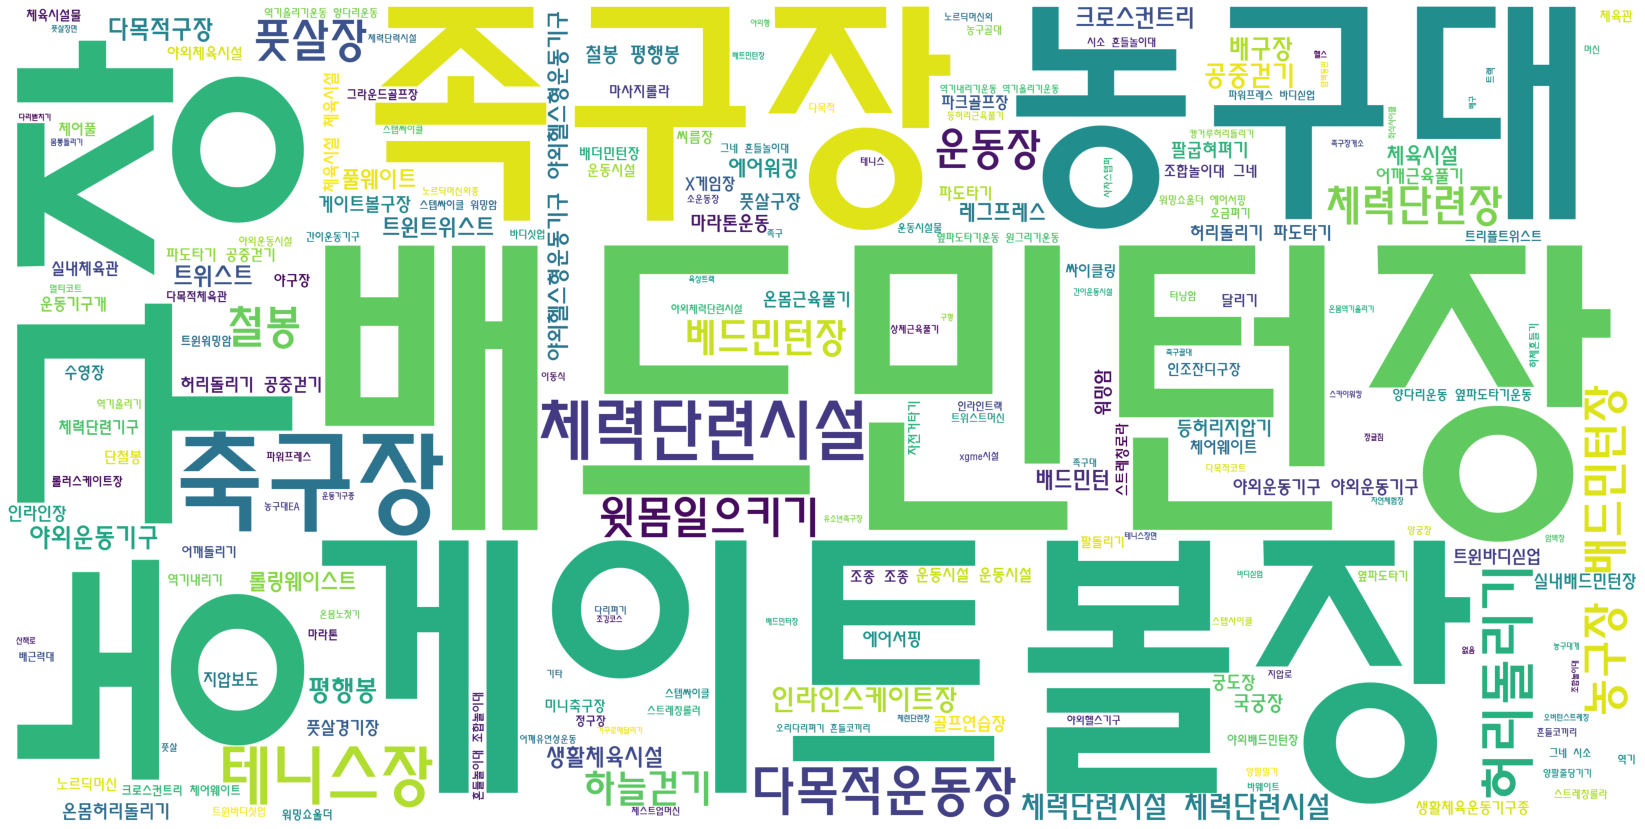

In [174]:
word_draw = WordCloud(
    font_path = 'C:\Windows\Fonts\HMFMMUEX.TTC',
    width = 4000,
    height = 2000,
    stopwords = ['운동기구','개소','외종'],
    background_color = 'white',
    )

word_draw.generate(gym)

plt.figure(figsize=(30,15))
plt.imshow(word_draw)
plt.axis('off')
plt.show()